# HW4-P2: SVMs and Hyperparameter Tuning (20 points)[TA: Sogol Mansouri]

In this part of HW4, you'll be working with Support Vector Machines.

## 0 Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
random_state = 42

In [2]:
from sklearn.model_selection import train_test_split


## 1 Loading the Data

First, load the data `svm_data_2020.csv`. 

In [3]:
df = pd.read_csv('data/svm_data_2020.csv')


In [4]:
df["Personal Loan"].value_counts()

0    138
1     87
Name: Personal Loan, dtype: int64

## 2 Splitting the Data

Now, split the data into a training and test set. 75% of the data should be in the training set, and 25% should be in the testing set.

Report the number of positive and negative samples in both training and testing data.

In [5]:
# Separate data feature (X) and data label (Y)

X = Y = None


In [6]:
#Split dataset into training and testing

X_train = X_test = y_train = y_test = None



In [8]:
assert X.shape == (225, 13)
assert Y.shape == (225,)
assert X_train.shape == (168, 13)
assert X_test.shape == (57, 13)
assert y_train.shape == (168,)
assert y_test.shape == (57,)

In [9]:
y_train.value_counts()

0    108
1     60
Name: Personal Loan, dtype: int64

In [10]:
y_test.value_counts()

0    30
1    27
Name: Personal Loan, dtype: int64

## 3 Training the Model

Now, you will use sklearns [support vector classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) to fit a model to this data.

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

### 3.1 Fitting the Model and Getting the Support Vectors

Fit an [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model to your training data using the default hyperparameters (for now!), and report back the number of support vectors. Use `clf.support_vectors_`, which returns a list of the actual support vectors. Below is an example of support vector classifier training and its support vectors.

In [12]:
num_support_vectors = None

#TODO: add your code here

# Show the number of support vectors
num_support_vectors

120

In [13]:
# Remember, we'll have hidden test cases too

### 3.2 C hyperparameter vs Support Vector Count

*C* is the regularization hyperparameter in SVMs, and in this problem you'll be looking at how changing *C* affects the number of support vectors.

Implement the function `plot_support_vectors` below, which will plot a line chart of the number of support vectors vs. the value of *C*.

**Before implementing the function, predict the answer the following questions**
1. As C increases, how will the number of support vectors change?
2. Why?

In [14]:
"""
Input:
    params: A list of floats, representing the values of C to try
    
Output:
    None
    Print a line chart of the number of support vectors vs. C
"""

def plot_support_vectors(params):
    svs = []
    
    # Fill in the list svs with the corresponding number of support vectors
    #TODO: add your code here
    
    plt.plot(params,svs,'bo--')
    plt.xlabel('C')
    plt.ylabel('Number of Support Vectors')
    plt.title('C and Its Effect on Number of Support Vectors')
    plt.show()
    return svs

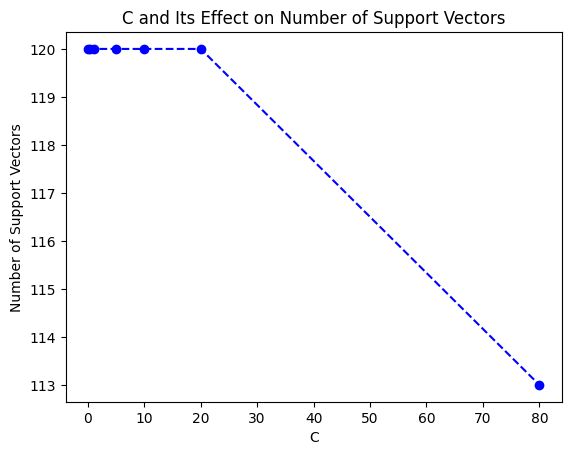

[120, 120, 120, 120, 120, 120, 113]


In [15]:
C = [0.1,0.3,1,5,10,20,80]
svs = plot_support_vectors(C)

# Remember, we'll have hidden test cases too

**Now that you have a plot, check your earlier answer.**

## 4) Hyperparam Tuning

Compare  the  performance  of  four  different  kernel  functions:  linear (`linear`), polynomial (`poly`),  radial basis function (`rbf`), and `sigmoid`. Not only will you be changing the kernel function, you'll also be optimizing for the other hyperparams, including hyperpareters that are specific to a given kernel.

For each type of kernel functions, train your SVM classifiers using the training data and evaluate the resulting SVM classifer using testing data using accuracy, precision, recall and f-measure of the corresponding classification results.


### 4.1 Basic Hyperparameters

Write a function called `best_hyperparams` that when given a dictionary of params, runs a `GridSearchCV` on an SVC model using the training and test data.

Use a `cv` of 3.

This function should return the optimized classifier `clf`, from a grid search (this classifier will include a list of it's best parameters in the property `best_params_`).

You've used GridSearchCV in the last homework. As a reminder, see the documentation for [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) for more info.

**Note**: While we are comparing each kernel individually in this case so we can inspect the results, you could also include the kernel itself as a hyperparameter in GridSearchCV (see below).

In [16]:
"""
Input:
    params_set: A dictionary of params to use for the grid search
    X_train: the training features
    y_train: the training labels
Output:
    The classifier with the best hyperparams, fit to the given training data and labels
"""
def best_hyperparams(param_set, X_train, y_train, cv=3):
    #TODO: add your code here

In [17]:
# Here are the value ranges for each of the params.
# We will tell you which of these to tune for which kernel.

# C is the regularization paramater we've discussed before
C = [0.1,0.2,0.5,1,2,3,5,10]

# degree is the degree of the polynomial used for the polynomial kernel
degree = [1,2,3]

# coef is the independent term in the kernel function, and is ony used by poly and sigmoid
coef0 = [0.01,0.02,0.1,0.2,1,2]

# gamma is the kernel coefficent used for rbf, poly, and sigmoid
gamma = [0.01,0.02,0.1,0.2,1,2]

In [18]:
from sklearn.metrics import classification_report

### Linear Kernel 
For the **linear** kernel, tune `C`.

In [19]:
params = [{
    "kernel":["linear"],
    "C":C
}]

model = best_hyperparams(params, X_train, y_train)
print(model.best_params_)
print(f'CV accuracy for best params: {model.best_score_}')


assert model.best_params_ == {'C': 1, 'kernel': 'linear'}

{'C': 1, 'kernel': 'linear'}
CV accuracy for best params: 0.8630952380952381


### Poly Kernel 
For the **polynomial** kernel, tune `C`, `degree` and `coef0`, where `degree` is the degree of the polynomial and `coef0` is the intercept.

In [20]:
params = [{
    "kernel":["poly"],
    "C":C,
    "degree":degree,
    "coef0":coef0
}]

model = best_hyperparams(params, X_train, y_train)
print(model.best_params_)
print(f'CV accuracy for best params: {model.best_score_}')

assert model.best_params_ == {'C': 5, 'coef0': 2, 'degree': 3, 'kernel': 'poly'}


{'C': 5, 'coef0': 2, 'degree': 3, 'kernel': 'poly'}
CV accuracy for best params: 0.7321428571428572


### RBF Kernel
For the **rbf** kernel, tune `C` and `gamma`.

In [21]:
params = [{
    "kernel":["rbf"],
    "C":C,
    "gamma":gamma
}]

model = best_hyperparams(params, X_train, y_train)
print(model.best_params_)
print(f'CV accuracy for best params: {model.best_score_}')

assert model.best_params_ == {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}


{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
CV accuracy for best params: 0.6428571428571429


### Sigmoid Kernel 

For the **sigmoid** kernel, tune `C`, `coef0`, and `gamma`.

In [22]:
params = [{
    "kernel":["sigmoid"],
    "C":C,
    "coef0":coef0,
    "gamma":gamma
}]

model = best_hyperparams(params, X_train, y_train)
print(model.best_params_)
print(f'CV accuracy for best params: {model.best_score_}')

assert model.best_params_ == {'C': 0.1, 'coef0': 0.01, 'gamma': 0.01, 'kernel': 'sigmoid'}


{'C': 0.1, 'coef0': 0.01, 'gamma': 0.01, 'kernel': 'sigmoid'}
CV accuracy for best params: 0.6428571428571429


Which kernel performed best, and what does that say about the data?